In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dense,BatchNormalization,Flatten,Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from skimage.io import imread
from skimage import transform

In [2]:
path=r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/train"
print(len(os.listdir(path)))
print(os.listdir(path))

5
['Degenerative disease', 'Inflammatory Disease', 'Normal brain', 'Neoplastic Disease', 'cerebrovascular brain']


In [3]:
training_data=ImageDataGenerator(rescale=1/255,shear_range=0.02,zoom_range=0.02,rotation_range=40,height_shift_range=[0,0.1],width_shift_range=[0,0.1],horizontal_flip=True,fill_mode="nearest")
validation_data=ImageDataGenerator(rescale=1/255)
testing_data=ImageDataGenerator(rescale=1/255)

In [4]:
train_data=training_data.flow_from_directory(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/train",target_size=(224,224),batch_size=16,color_mode="rgb",shuffle=True,class_mode="categorical")
valid_data=validation_data.flow_from_directory(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/val",target_size=(224,224),batch_size=16,color_mode="rgb",shuffle=True,class_mode="categorical")
test_data=testing_data.flow_from_directory(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/test",target_size=(224,224),batch_size=1,color_mode="rgb",shuffle=False,class_mode="categorical")

Found 2789 images belonging to 5 classes.
Found 346 images belonging to 5 classes.
Found 354 images belonging to 5 classes.


In [6]:
model=VGG19()
model.summary()

574710816/574710816 [==============================] - 26s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [7]:
model=VGG19(input_shape=(224,224,3),weights="imagenet",include_top=False)
model.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [8]:
for layers in model.layers:
  layers.trainable=False

In [9]:
tensorflow.random.set_seed(21)

model=tensorflow.keras.models.Sequential([model,
                                         tensorflow.keras.layers.GlobalAveragePooling2D(),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(2048,activation="relu"),
                                         tensorflow.keras.layers.Dropout(0.5),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(512,activation="relu"),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(256,activation="relu"),
                                        tensorflow.keras.layers.BatchNormalization(),
                                          tensorflow.keras.layers.Dense(128,activation="relu"),
                                          tensorflow.keras.layers.Dense(5,activation="softmax")])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              1050624   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8

In [10]:
opt=Adam(learning_rate=1e-5)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [12]:
history=model.fit(train_data,validation_data=(test_data),epochs=100,batch_size=8)

Epoch 1/100
175/175 [==============================] - 1791s 10s/step - loss: 1.9638 - accuracy: 0.2345 - val_loss: 1.7186 - val_accuracy: 0.0932
Epoch 2/100
175/175 [==============================] - 53s 302ms/step - loss: 1.7564 - accuracy: 0.2958 - val_loss: 1.6217 - val_accuracy: 0.2090
Epoch 3/100
175/175 [==============================] - 54s 307ms/step - loss: 1.5891 - accuracy: 0.3539 - val_loss: 1.2978 - val_accuracy: 0.4322
Epoch 4/100
175/175 [==============================] - 53s 301ms/step - loss: 1.4760 - accuracy: 0.4102 - val_loss: 1.0719 - val_accuracy: 0.5989
Epoch 5/100
175/175 [==============================] - 54s 307ms/step - loss: 1.3505 - accuracy: 0.4618 - val_loss: 0.9680 - val_accuracy: 0.6356
Epoch 6/100
175/175 [==============================] - 52s 298ms/step - loss: 1.2825 - accuracy: 0.4912 - val_loss: 0.9120 - val_accuracy: 0.6638
Epoch 7/100
175/175 [==============================] - 53s 301ms/step - loss: 1.2024 - accuracy: 0.5267 - val_loss: 0.8648 -

In [13]:
model.save(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/VGG19.h5")

In [14]:
loaded_model=load_model(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/VGG19.h5")

In [15]:
accuracy_score=model.evaluate(train_data)
accuracy_score
print("Accuracy score for training set:",accuracy_score[1]*100)
print("Loss score for training set:",accuracy_score[0])

175/175 [==============================] - 48s 276ms/step - loss: 0.0724 - accuracy: 0.9774
Accuracy score for training set: 97.74112701416016
Loss score for training set: 0.07240650802850723


In [16]:
accuracy_score=model.evaluate(test_data)
accuracy_score
print("Accuracy score for training set:",accuracy_score[1]*100)
print("Loss score for training set:",accuracy_score[0])

354/354 [==============================] - 5s 14ms/step - loss: 0.0716 - accuracy: 0.9718
Accuracy score for training set: 97.17513918876648
Loss score for training set: 0.07163485139608383


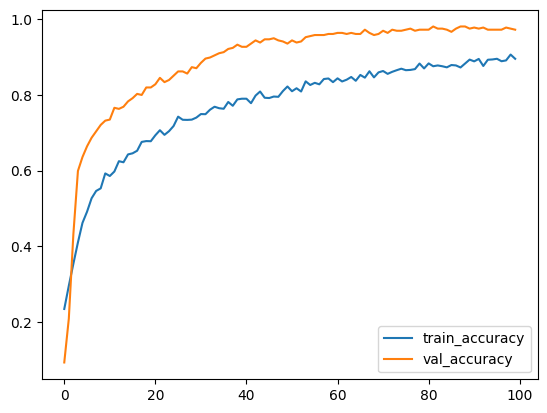

In [17]:
plt.plot(history.history["accuracy"],label="train_accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

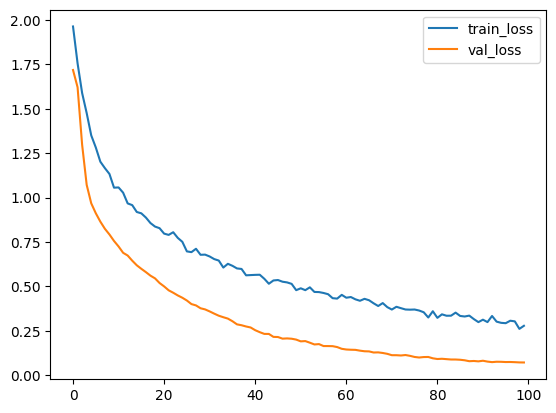

In [18]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [19]:
y_prediction=loaded_model.predict(test_data)

354/354 [==============================] - 4s 12ms/step


In [20]:
y_prediction

array([[9.9983346e-01, 1.5767380e-05, 6.4513224e-05, 2.9950679e-06,
        8.3318337e-05],
       [9.9381977e-01, 1.8765893e-03, 1.1892627e-03, 6.5160937e-05,
        3.0492397e-03],
       [9.9995422e-01, 1.6640808e-05, 2.1679523e-05, 2.8427852e-08,
        7.3904075e-06],
       ...,
       [3.8438952e-03, 6.5021223e-01, 7.2090910e-03, 2.0979460e-04,
        3.3852494e-01],
       [1.0268312e-04, 8.8523487e-03, 5.7086290e-05, 4.1015592e-06,
        9.9098372e-01],
       [4.1900278e-04, 6.2418854e-05, 7.2301864e-06, 2.1461258e-06,
        9.9950922e-01]], dtype=float32)

In [21]:
y_pred=np.argmax(y_prediction,axis=1)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [22]:
cm=confusion_matrix(test_data.classes,y_pred)
cm

array([[ 82,   0,   0,   0,   0],
       [  0,  66,   2,   0,   1],
       [  0,   2,  56,   0,   0],
       [  0,   0,   0,  30,   0],
       [  1,   2,   2,   0, 110]])

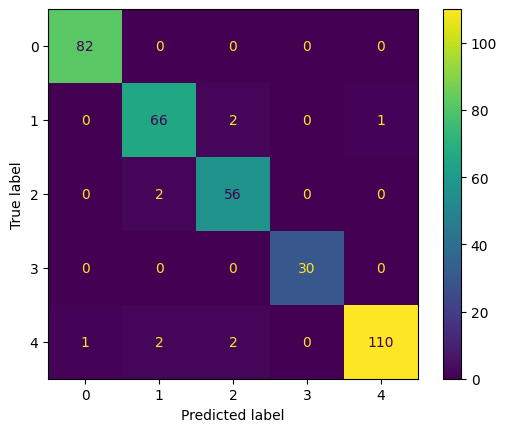

In [23]:
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

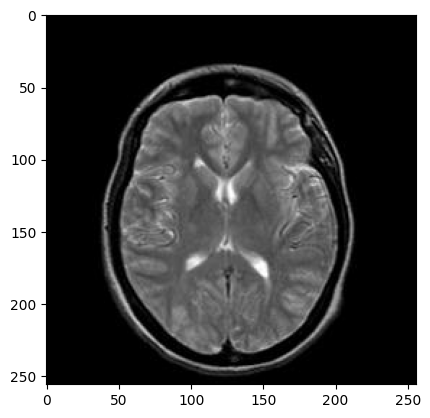

In [24]:
I_test=imread(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/test/cerebrovascular brain/cerebrovascular brain (1001).JPG")
plt.imshow(I_test)

In [25]:
I_test=np.array(I_test).astype('float32')/255
I_test=transform.resize(I_test,(224,224,3))
I_test=np.expand_dims(I_test,axis=0)

In [26]:
prediction=loaded_model.predict(I_test)
result=np.argmax(prediction)
result

1/1 [==============================] - 0s 237ms/step


4